In [ ]:
!pip install catboost

     |████████████████████████████████| 65.7MB 60kB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
pd.set_option('display.max_columns', None)
%matplotlib inline
#import shap
#shap.initjs()
import time
#import colorama  # https://pypi.python.org/pypi/colorama

### Feature Processing
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from dateutil import relativedelta
from sklearn.preprocessing import LabelEncoder

### Feature Selection Techniques
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold

### Train Test Split
from sklearn.model_selection import train_test_split

### Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import  XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier,Pool

### Metrics
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

### Hyper Paramter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

### Loading and Saving Model
import pickle

### Ensemble Technique - Combining Multiple models
## We call the algorithms like this way

## Then we use Voting Classifier for ensemble learning:
from sklearn.ensemble import VotingClassifier

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
all_data_og = pd.read_csv('/content/drive/MyDrive/Data Science Competitions/Job A Thon - Health Insurance Lead Prediction/All_data_Combined_New_Features_Without_Outliers.csv')
all_data_og.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
all_data = all_data_og.copy()
all_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
all_data = all_data.drop(['Region_Code','Lower_Age'],axis=1)
train_data_final = all_data.iloc[:50882,:]
test_data_final = all_data.iloc[50882:,:]
train_data_final['Response'] = train_data_final['Response'].astype(int)
test_data_final = test_data_final.drop('Response',axis=1)
test_data_final.index = range(0,len(test_data_final))
display(train_data_final.head(2))
display(test_data_final.head(2))

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,Rented,Individual,36,No,X1,99.0,3.0,22,11628.0,0,0,0,0,0,0,0,3000,10000,8,4
1,C5,Owned,Joint,75,No,X2,-1.0,-1.0,22,30510.0,0,1,1,0,1,0,53,1000,30000,4,9


,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C1,Owned,Individual,30,No,UNK,6.0,3.0,5,11934.0,0,0,1,0,0,0,100,10000,1,4
1,C4,Owned,Joint,69,Yes,X1,3.0,3.0,18,32204.8,0,0,0,0,0,1,7,30000,0,9


In [ ]:
for fe in ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Reco_Policy_Cat']:
  prob_df = train_data_final.groupby([fe])['Response'].mean()
  prob_df = pd.DataFrame(prob_df)
  prob_df['Not_Response'] = 1-prob_df['Response']
  prob_df['Probability_ratio']=prob_df['Response']/prob_df['Not_Response']
  probability_encoding = prob_df['Probability_ratio'].to_dict()
  train_data_final[fe]=train_data_final[fe].map(probability_encoding)
  test_data_final[fe]=test_data_final[fe].map(probability_encoding)

In [ ]:
y = train_data_final['Response']
X = train_data_final.drop('Response',axis=1)

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = CatBoostClassifier(verbose=0, n_estimators=1000)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores

array([0.65987311, 0.66372922, 0.66133377, 0.67469429, 0.66768103,
       0.66352345, 0.64659928, 0.66551867, 0.65314958, 0.65826157])

In [ ]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.661 (0.007)


### Important Features

In [ ]:
#apply SelectKBest class to extract top 10 best features-above 99 features obtained
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Specs','Score']  
#print 10 best features
print(featureScores.nlargest(15,'Score'))  

                                           Specs        Score
8                                Reco_Policy_Cat  1968.647157
0                                      City_Code    29.559389
5                               Health Indicator    10.709809
15                    Age_Difference_Upper_Lower     7.679177
2                            Reco_Insurance_Type     4.978498
6                        Holding_Policy_Duration     4.254494
19                    Reco_Policy_Premium___BINS     3.266643
9                            Reco_Policy_Premium     3.210601
12                          Health Indicator_NAN     2.751849
14  Holding_Policy_Dur_Type_Health_Indicator_NAN     1.857433
1                              Accomodation_Type     1.376414
17            Reco_Policy_Premium___WHOLE_NUMBER     1.335338
7                            Holding_Policy_Type     1.172858
4                                      Is_Spouse     0.757694
3                                      Upper_Age     0.391031


In [ ]:
imp_features = featureScores.nlargest(15,'Score')['Specs'].tolist()
imp_features

['Reco_Policy_Cat',
 'City_Code',
 'Health Indicator',
 'Age_Difference_Upper_Lower',
 'Reco_Insurance_Type',
 'Holding_Policy_Duration',
 'Reco_Policy_Premium___BINS',
 'Reco_Policy_Premium',
 'Health Indicator_NAN',
 'Holding_Policy_Dur_Type_Health_Indicator_NAN',
 'Accomodation_Type',
 'Reco_Policy_Premium___WHOLE_NUMBER',
 'Holding_Policy_Type',
 'Is_Spouse',
 'Upper_Age']

In [ ]:
X = X[imp_features]
X.head()

,Reco_Policy_Cat,City_Code,Health Indicator,Age_Difference_Upper_Lower,Reco_Insurance_Type,Holding_Policy_Duration,Reco_Policy_Premium___BINS,Reco_Policy_Premium,Health Indicator_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Accomodation_Type,Reco_Policy_Premium___WHOLE_NUMBER,Holding_Policy_Type,Is_Spouse,Upper_Age
0,0.488949,0.311427,0.322961,0,0.312015,99.0,4,11628.0,0,0,0.311467,10000,3.0,0.314429,36
1,0.488949,0.299048,0.317689,53,0.330333,-1.0,9,30510.0,0,0,0.319190,30000,-1.0,0.314429,75
2,0.383066,0.299048,0.305819,0,0.312015,1.0,1,7450.0,1,0,0.319190,7000,1.0,0.314429,32
3,0.383066,0.307329,0.322961,4,0.330333,99.0,7,17780.0,0,0,0.319190,10000,3.0,0.314429,52
4,0.287922,0.319211,0.317689,0,0.312015,3.0,3,10404.0,0,0,0.311467,10000,1.0,0.314429,44


In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = CatBoostClassifier(verbose=0, n_estimators=1000)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores

array([0.65856366, 0.65641137, 0.65361291, 0.67346716, 0.66299732,
       0.65802777, 0.6444255 , 0.66751823, 0.64347945, 0.65936025])

### Other Encoding Techniques

In [ ]:
all_data = all_data_og.copy()
all_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
#all_data = all_data.drop(['Region_Code','Lower_Age'],axis=1)
train_data_final = all_data.iloc[:50882,:]
test_data_final = all_data.iloc[50882:,:]
train_data_final['Response'] = train_data_final['Response'].astype(int)
test_data_final = test_data_final.drop('Response',axis=1)
test_data_final.index = range(0,len(test_data_final))
display(train_data_final.head(2))
display(test_data_final.head(2))

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0,0,0,0,0,0,0,3000,10000,8,4
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0,1,1,0,1,0,53,1000,30000,4,9


,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C1,156,Owned,Individual,30,30,No,UNK,6.0,3.0,5,11934.0,0,0,1,0,0,0,100,10000,1,4
1,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8,0,0,0,0,0,1,7,30000,0,9


In [ ]:
for fe in ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Reco_Policy_Cat']:
  prob_df = train_data_final.groupby([fe])['Response'].mean()
  prob_df = pd.DataFrame(prob_df)
  prob_df['Not_Response'] = 1-prob_df['Response']
  prob_df['Probability_ratio']=prob_df['Response']/prob_df['Not_Response']
  probability_encoding = prob_df['Probability_ratio'].to_dict()
  train_data_final[fe]=train_data_final[fe].map(probability_encoding)
  test_data_final[fe]=test_data_final[fe].map(probability_encoding)

In [ ]:
y = train_data_final['Response']
X = train_data_final.drop('Response',axis=1)

In [ ]:
X.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,0.311427,3213,0.311467,0.312015,36,36,0.314429,0.322961,99.0,3.0,0.488949,11628.0,0,0,0,0,0,0,3000,10000,8,4
1,0.299048,1117,0.319190,0.330333,75,22,0.314429,0.317689,-1.0,-1.0,0.488949,30510.0,1,1,0,1,0,53,1000,30000,4,9
2,0.299048,3732,0.319190,0.312015,32,32,0.314429,0.305819,1.0,1.0,0.383066,7450.0,0,0,1,0,0,0,3000,7000,8,1
3,0.307329,4378,0.319190,0.330333,52,48,0.314429,0.322961,99.0,3.0,0.383066,17780.0,0,0,0,0,0,4,4000,10000,9,7
4,0.319211,2190,0.311467,0.312015,44,44,0.314429,0.317689,3.0,1.0,0.287922,10404.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = CatBoostClassifier(verbose=0, n_estimators=1000)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores

array([0.65557618, 0.66427904, 0.66116798, 0.67944115, 0.66723824,
       0.66668545, 0.65044801, 0.66674777, 0.65045133, 0.65895568])

In [ ]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.662 (0.008)


In [ ]:
X.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,0.311427,3213,0.311467,0.312015,36,36,0.314429,0.322961,99.0,3.0,0.488949,11628.0,0,0,0,0,0,0,3000,10000,8,4
1,0.299048,1117,0.319190,0.330333,75,22,0.314429,0.317689,-1.0,-1.0,0.488949,30510.0,1,1,0,1,0,53,1000,30000,4,9
2,0.299048,3732,0.319190,0.312015,32,32,0.314429,0.305819,1.0,1.0,0.383066,7450.0,0,0,1,0,0,0,3000,7000,8,1
3,0.307329,4378,0.319190,0.330333,52,48,0.314429,0.322961,99.0,3.0,0.383066,17780.0,0,0,0,0,0,4,4000,10000,9,7
4,0.319211,2190,0.311467,0.312015,44,44,0.314429,0.317689,3.0,1.0,0.287922,10404.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
corr_features = ['Holding_Policy_Duration_NAN','Holding_Policy_Duration_Policy_Type_NAN','Holding_Policy_Type_NAN','Is_Spouse','Reco_Policy_Premium___BINS',
                 'Reco_Policy_Premium___WHOLE_NUMBER','Region_Code___BINS']
corr_features

['Holding_Policy_Duration_NAN',
 'Holding_Policy_Duration_Policy_Type_NAN',
 'Holding_Policy_Type_NAN',
 'Is_Spouse',
 'Reco_Policy_Premium___BINS',
 'Reco_Policy_Premium___WHOLE_NUMBER',
 'Region_Code___BINS']

In [ ]:
X = X.drop(corr_features,axis=1)
X.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Health Indicator_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER
0,0.311427,3213,0.311467,0.312015,36,36,0.322961,99.0,3.0,0.488949,11628.0,0,0,0,3000
1,0.299048,1117,0.319190,0.330333,75,22,0.317689,-1.0,-1.0,0.488949,30510.0,0,0,53,1000
2,0.299048,3732,0.319190,0.312015,32,32,0.305819,1.0,1.0,0.383066,7450.0,1,0,0,3000
3,0.307329,4378,0.319190,0.330333,52,48,0.322961,99.0,3.0,0.383066,17780.0,0,0,4,4000
4,0.319211,2190,0.311467,0.312015,44,44,0.317689,3.0,1.0,0.287922,10404.0,0,0,0,2000


In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = CatBoostClassifier(verbose=0, n_estimators=1000)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores

array([0.65539104, 0.66340768, 0.66606312, 0.68111425, 0.66673664,
       0.66620432, 0.64880415, 0.66688946, 0.65089678, 0.65672108])

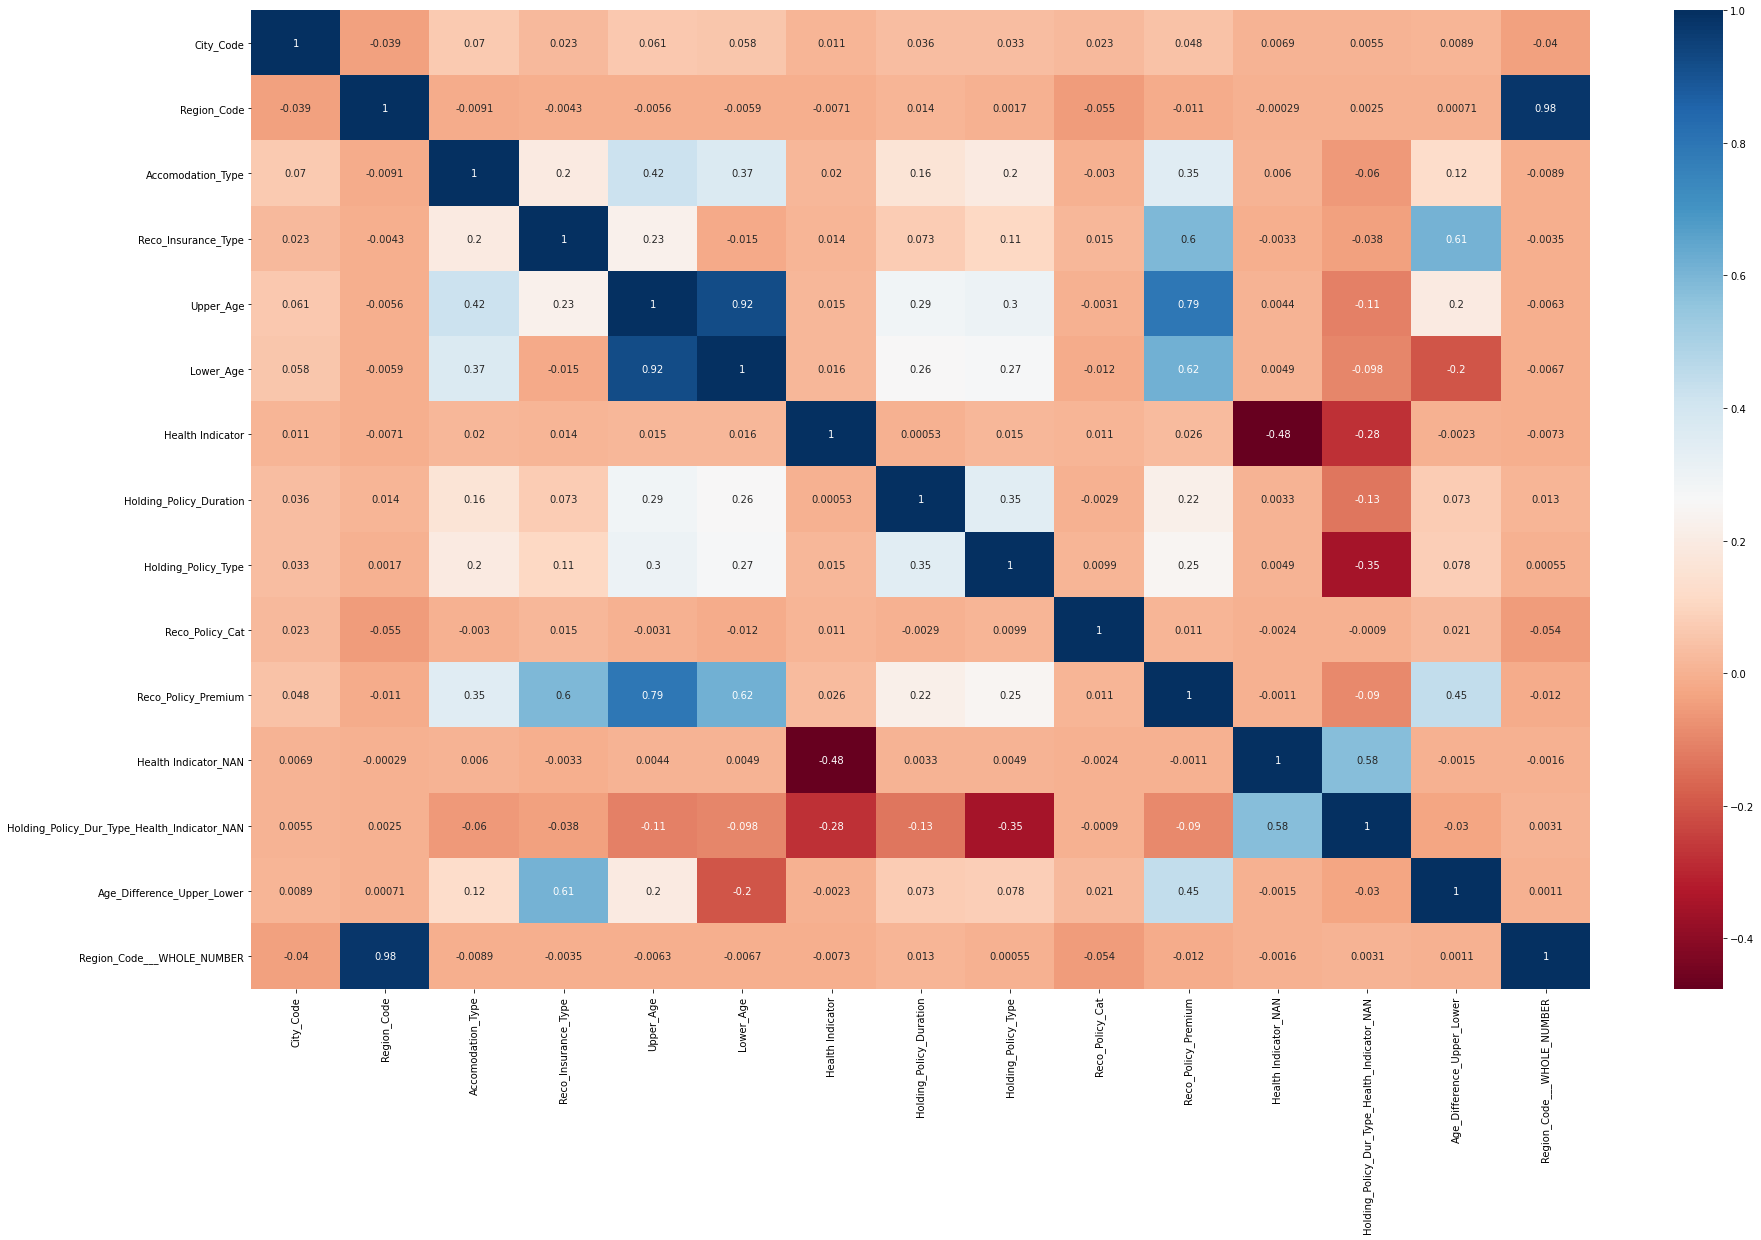

In [ ]:
dataset = train_data_final.copy()
plt.figure(figsize=(30, 18))
sns.heatmap(X.corr(),annot=True,cmap='RdBu')
plt.show()

#### Hash Encoding

In [ ]:
all_data = all_data_og.copy()
all_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
all_data.shape

(72687, 23)

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.6MB/s 


In [ ]:
import category_encoders as ce
encoder=ce.HashingEncoder(cols='Region_Code',n_components=10)
all_data=encoder.fit_transform(all_data)
all_data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,0,0,0,1,0,0,0,0,0,0,C3,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4
1,0,0,0,0,1,0,0,0,0,0,C5,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9
2,0,0,0,0,0,0,1,0,0,0,C5,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1
3,0,0,0,0,0,0,0,1,0,0,C24,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7
4,0,0,0,0,0,0,0,0,1,0,C8,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
all_data.shape

(72687, 32)

In [ ]:
#all_data = all_data.drop(['Region_Code','Lower_Age'],axis=1)
train_data_final = all_data.iloc[:50882,:]
test_data_final = all_data.iloc[50882:,:]
train_data_final['Response'] = train_data_final['Response'].astype(int)
test_data_final = test_data_final.drop('Response',axis=1)
test_data_final.index = range(0,len(test_data_final))
display(train_data_final.head(2))
display(test_data_final.head(2))

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,0,0,0,1,0,0,0,0,0,0,C3,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0,0,0,0,0,0,0,3000,10000,8,4
1,0,0,0,0,1,0,0,0,0,0,C5,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0,1,1,0,1,0,53,1000,30000,4,9


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,0,0,1,0,0,0,0,0,0,0,C1,Owned,Individual,30,30,No,UNK,6.0,3.0,5,11934.0,0,0,1,0,0,0,100,10000,1,4
1,0,0,0,0,0,1,0,0,0,0,C4,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8,0,0,0,0,0,1,7,30000,0,9


In [ ]:
for fe in ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Reco_Policy_Cat']:
  prob_df = train_data_final.groupby([fe])['Response'].mean()
  prob_df = pd.DataFrame(prob_df)
  prob_df['Not_Response'] = 1-prob_df['Response']
  prob_df['Probability_ratio']=prob_df['Response']/prob_df['Not_Response']
  probability_encoding = prob_df['Probability_ratio'].to_dict()
  train_data_final[fe]=train_data_final[fe].map(probability_encoding)
  test_data_final[fe]=test_data_final[fe].map(probability_encoding)

In [ ]:
y = train_data_final['Response']
X = train_data_final.drop('Response',axis=1)

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = CatBoostClassifier(verbose=0, n_estimators=1000)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores

array([0.66108668, 0.66172219, 0.66891919, 0.67406247, 0.66899009,
       0.66911211, 0.64755965, 0.65559346, 0.65712489, 0.66292875])

In [ ]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.663 (0.008)


Removing Some Highly correlated Featrues 

In [ ]:
X = X.drop(corr_features,axis=1)
X.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Health Indicator_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER
0,0,0,0,1,0,0,0,0,0,0,0.311427,0.311467,0.312015,36,36,0.322961,99.0,3.0,0.488949,11628.0,0,0,0,3000
1,0,0,0,0,1,0,0,0,0,0,0.299048,0.319190,0.330333,75,22,0.317689,-1.0,-1.0,0.488949,30510.0,0,0,53,1000
2,0,0,0,0,0,0,1,0,0,0,0.299048,0.319190,0.312015,32,32,0.305819,1.0,1.0,0.383066,7450.0,1,0,0,3000
3,0,0,0,0,0,0,0,1,0,0,0.307329,0.319190,0.330333,52,48,0.322961,99.0,3.0,0.383066,17780.0,0,0,4,4000
4,0,0,0,0,0,0,0,0,1,0,0.319211,0.311467,0.312015,44,44,0.317689,3.0,1.0,0.287922,10404.0,0,0,0,2000


In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = CatBoostClassifier(verbose=0, n_estimators=1000)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores

array([0.76400079, 0.74454706, 0.76493711, 0.76159591, 0.7629717 ,
       0.7672956 , 0.75825472, 0.76709906, 0.76100629, 0.75609277])

In [ ]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.761 (0.006)


### BaseNEncoding

In [ ]:
all_data = all_data_og.copy()
all_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,3213,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4
1,C5,1117,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9
2,C5,3732,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1
3,C24,4378,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
import category_encoders as ce
encoder= ce.BaseNEncoder(cols=['Region_Code'],return_df=True,base=4)
all_data=encoder.fit_transform(all_data)
all_data.head()

,City_Code,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,0,0,0,0,0,0,0,1,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0.0,0,0,0,0,0,0,3000,10000,8,4
1,C5,0,0,0,0,0,0,0,2,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0.0,1,1,0,1,0,53,1000,30000,4,9
2,C5,0,0,0,0,0,0,0,3,Owned,Individual,32,32,No,UNK,1.0,1.0,19,7450.0,1.0,0,0,1,0,0,0,3000,7000,8,1
3,C24,0,0,0,0,0,0,1,0,Owned,Joint,52,48,No,X1,99.0,3.0,19,17780.0,0.0,0,0,0,0,0,4,4000,10000,9,7
4,C8,0,0,0,0,0,0,1,1,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0,0,0,0,2000,10000,6,3


In [ ]:
#all_data = all_data.drop(['Region_Code','Lower_Age'],axis=1)
train_data_final = all_data.iloc[:50882,:]
test_data_final = all_data.iloc[50882:,:]
train_data_final['Response'] = train_data_final['Response'].astype(int)
test_data_final = test_data_final.drop('Response',axis=1)
test_data_final.index = range(0,len(test_data_final))
display(train_data_final.head(2))
display(test_data_final.head(2))

,City_Code,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C3,0,0,0,0,0,0,0,1,Rented,Individual,36,36,No,X1,99.0,3.0,22,11628.0,0,0,0,0,0,0,0,3000,10000,8,4
1,C5,0,0,0,0,0,0,0,2,Owned,Joint,75,22,No,X2,-1.0,-1.0,22,30510.0,0,1,1,0,1,0,53,1000,30000,4,9


,City_Code,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_NAN,Holding_Policy_Type_NAN,Health Indicator_NAN,Holding_Policy_Duration_Policy_Type_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER,Reco_Policy_Premium___WHOLE_NUMBER,Region_Code___BINS,Reco_Policy_Premium___BINS
0,C1,0,0,0,0,1,2,0,2,Owned,Individual,30,30,No,UNK,6.0,3.0,5,11934.0,0,0,1,0,0,0,100,10000,1,4
1,C4,0,0,0,2,1,3,3,2,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8,0,0,0,0,0,1,7,30000,0,9


In [ ]:
for fe in ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Reco_Policy_Cat']:
  prob_df = train_data_final.groupby([fe])['Response'].mean()
  prob_df = pd.DataFrame(prob_df)
  prob_df['Not_Response'] = 1-prob_df['Response']
  prob_df['Probability_ratio']=prob_df['Response']/prob_df['Not_Response']
  probability_encoding = prob_df['Probability_ratio'].to_dict()
  train_data_final[fe]=train_data_final[fe].map(probability_encoding)
  test_data_final[fe]=test_data_final[fe].map(probability_encoding)

In [ ]:
y = train_data_final['Response']
X = train_data_final.drop('Response',axis=1)

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = CatBoostClassifier(verbose=0, n_estimators=1000)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores

array([0.65845043, 0.66719999, 0.66914526, 0.68318642, 0.67189648,
       0.67049762, 0.65132128, 0.66877532, 0.64663422, 0.66771986])

In [ ]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.665 (0.010)


In [ ]:
X = X.drop(corr_features,axis=1)
X.head()

,City_Code,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Health Indicator_NAN,Holding_Policy_Dur_Type_Health_Indicator_NAN,Age_Difference_Upper_Lower,Region_Code___WHOLE_NUMBER
0,0.311427,0,0,0,0,0,0,0,1,0.311467,0.312015,36,36,0.322961,99.0,3.0,0.488949,11628.0,0,0,0,3000
1,0.299048,0,0,0,0,0,0,0,2,0.319190,0.330333,75,22,0.317689,-1.0,-1.0,0.488949,30510.0,0,0,53,1000
2,0.299048,0,0,0,0,0,0,0,3,0.319190,0.312015,32,32,0.305819,1.0,1.0,0.383066,7450.0,1,0,0,3000
3,0.307329,0,0,0,0,0,0,1,0,0.319190,0.330333,52,48,0.322961,99.0,3.0,0.383066,17780.0,0,0,4,4000
4,0.319211,0,0,0,0,0,0,1,1,0.311467,0.312015,44,44,0.317689,3.0,1.0,0.287922,10404.0,0,0,0,2000


In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = CatBoostClassifier(verbose=0, n_estimators=1000)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores

array([0.66095847, 0.6694524 , 0.67447384, 0.68235602, 0.67166998,
       0.66863791, 0.65699342, 0.66190155, 0.64958656, 0.66839432])

In [ ]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.666 (0.009)
